# Boston Housing - EDA and Regression Analysis

This notebook demonstrates a multiple linear regression workflow using the Boston Housing dataset from Kaggle. Each step is explained with markdown between code cells.

## Dataset Source
https://www.kaggle.com/competitions/boston-housing/data

In [151]:
import pandas as pd
#read the data
file_path_train = 'data/boston-housing/train.csv'
file_path_test = 'data/boston-housing/test.csv'

df = pd.read_csv(file_path_train)
df_predict = pd.read_csv(file_path_test)

## Exploratory Data Analysis (EDA)

### Inspecting the Dataset

We begin by loading the dataset and inspecting its structure, including the first few rows and summary statistics.

In [152]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [154]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [155]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Separating Features and Target Variable

In [156]:
X = df.drop("medv", axis=1)
y = df["medv"]

### Data Visualization and Analysis

#### Visualizing Numerical Features


##### Distribution Plots
Distribution plots for numerical features to understand their distributions and identify any potential outliers.

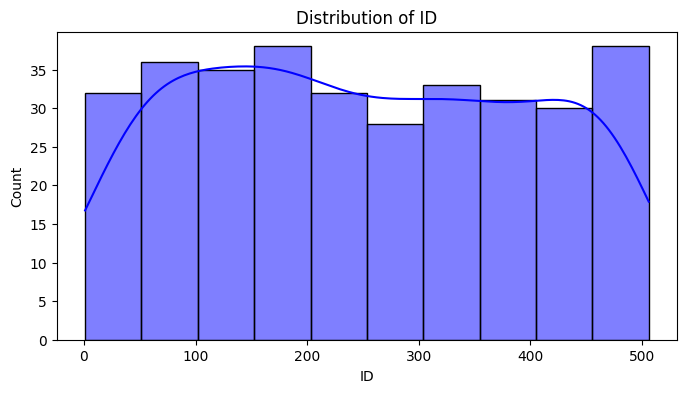

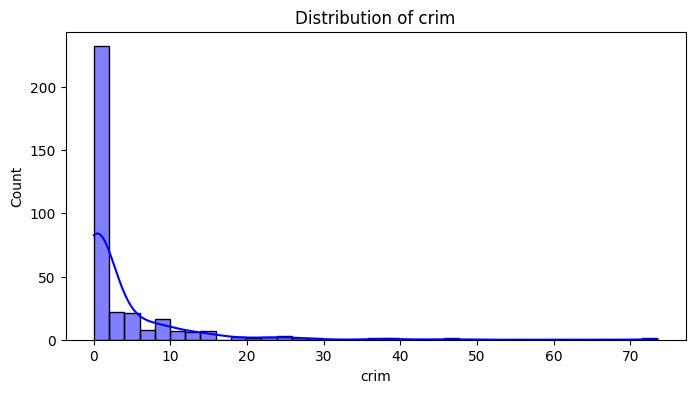

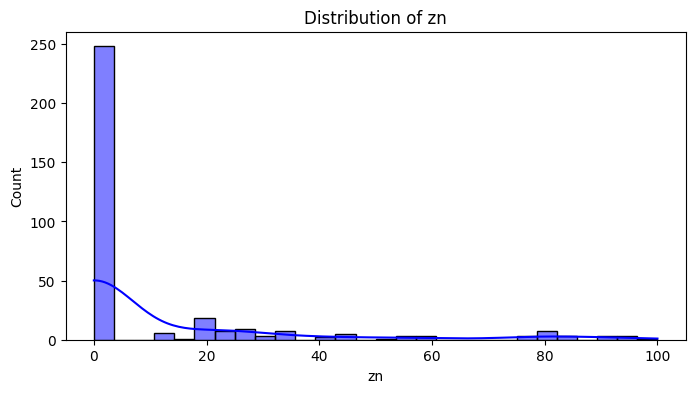

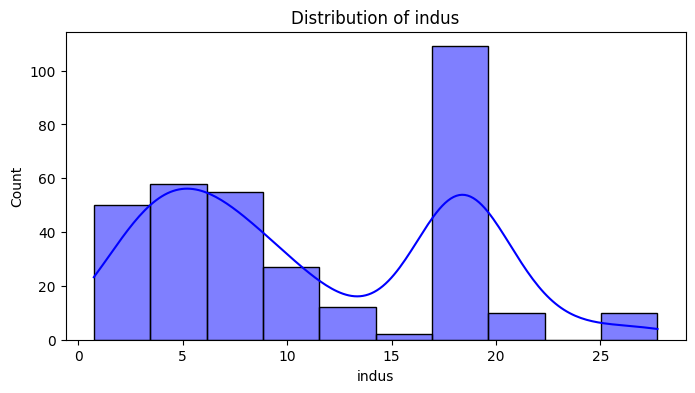

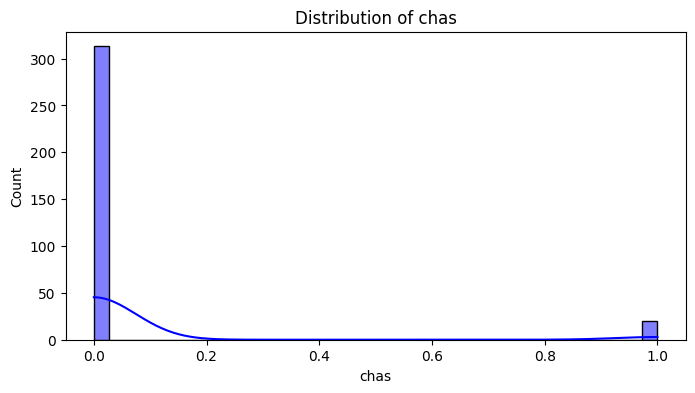

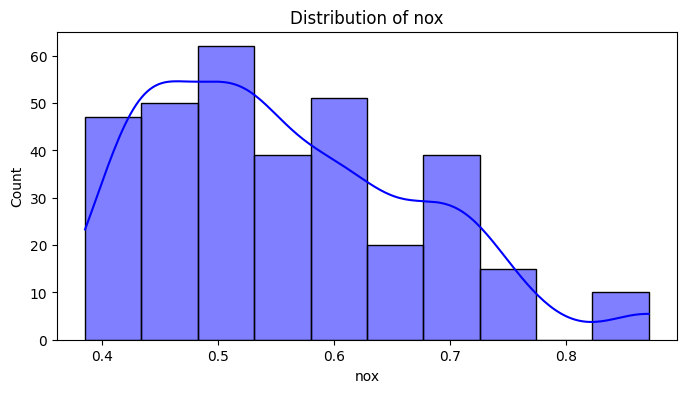

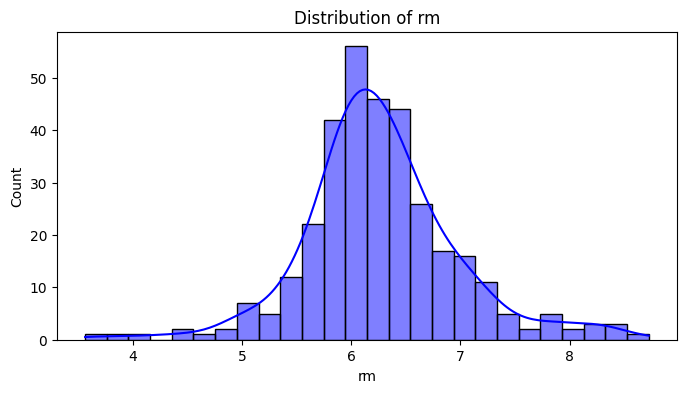

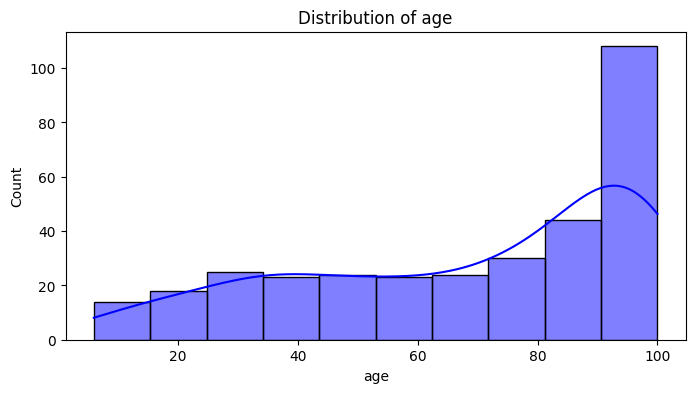

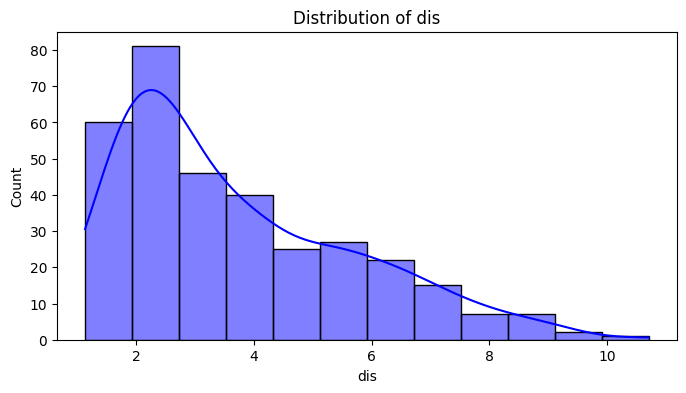

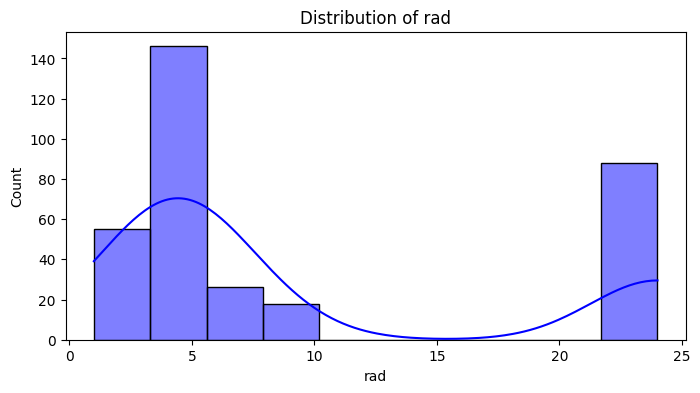

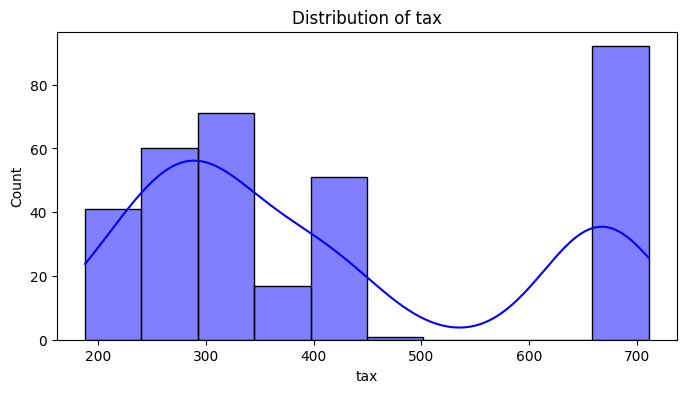

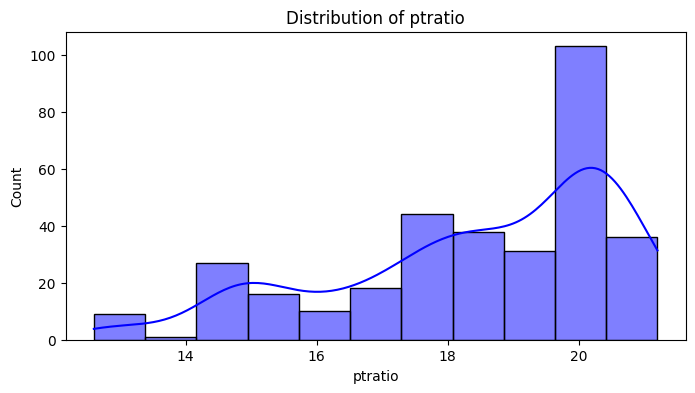

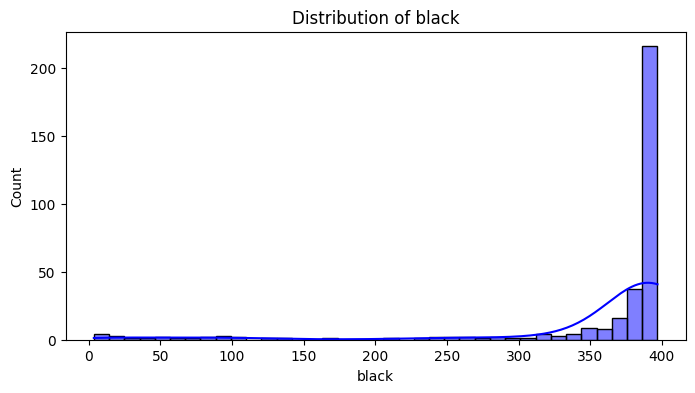

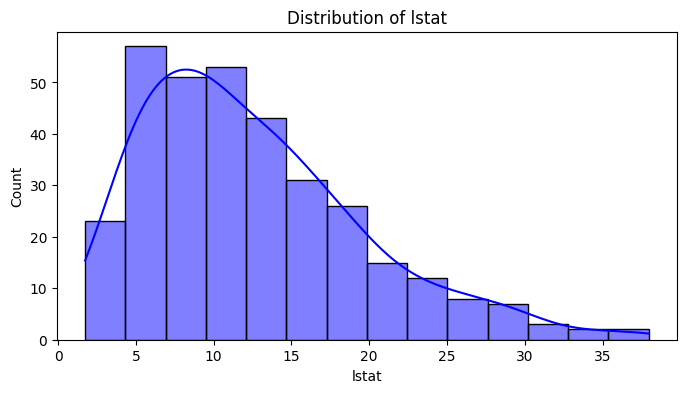

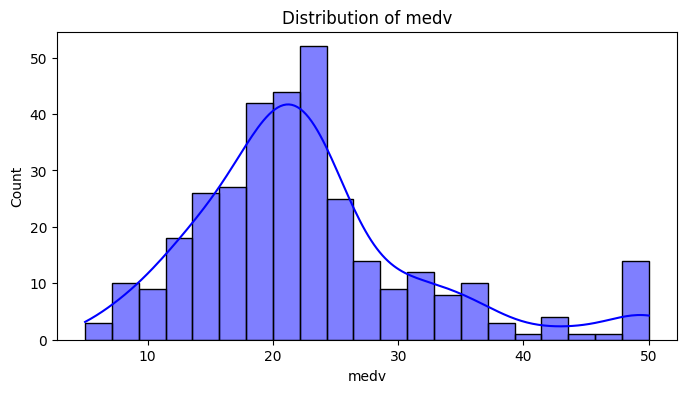

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

##### Scatter Plots
Scatter plots to visualize relationships between numerical features and the target variable (medical cost).

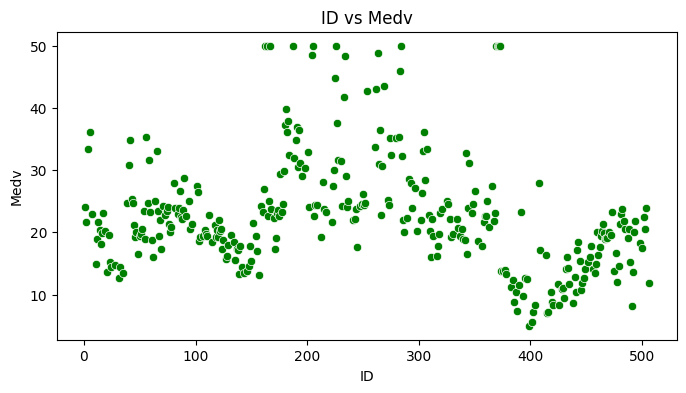

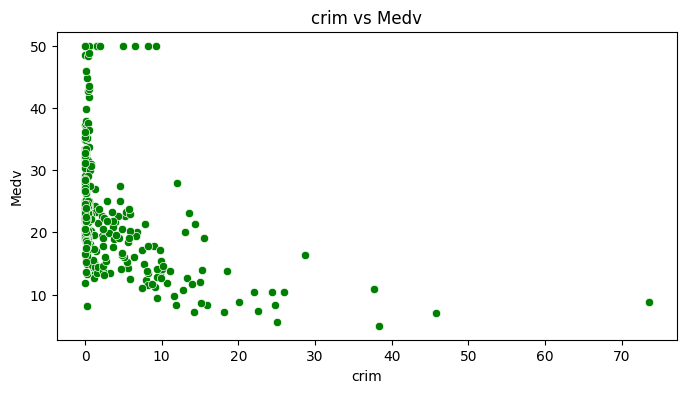

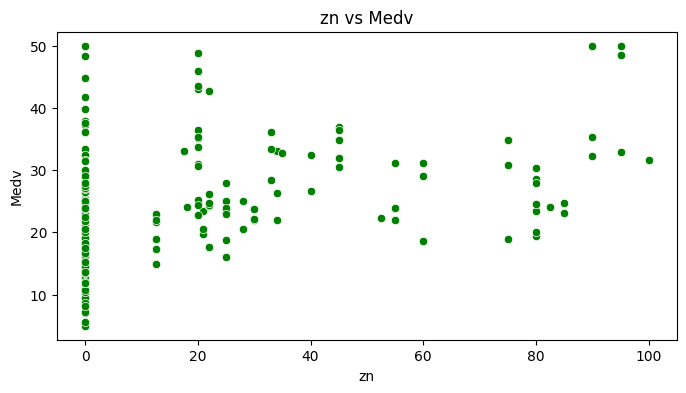

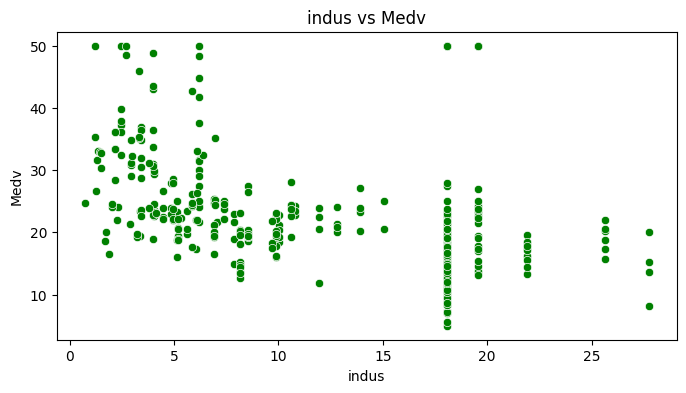

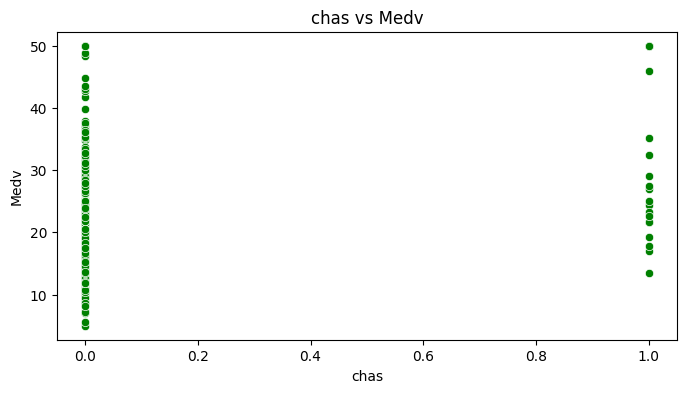

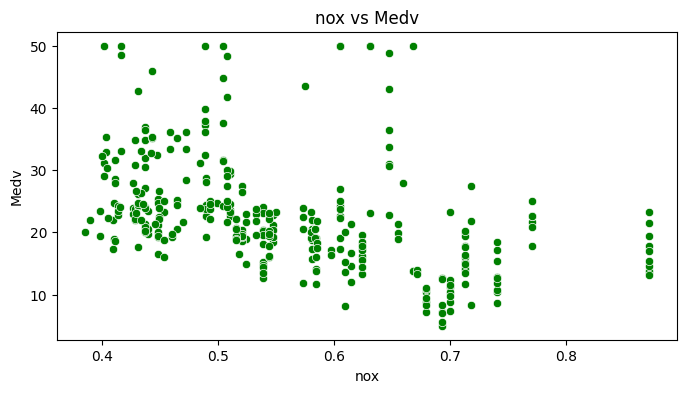

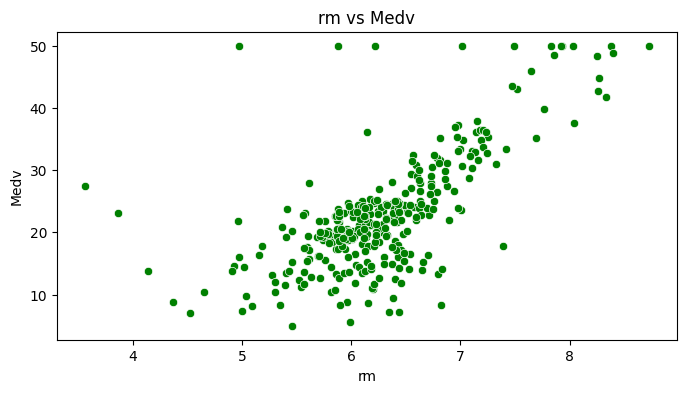

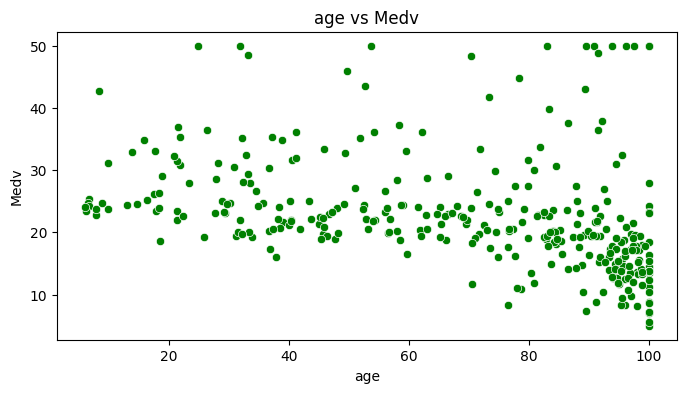

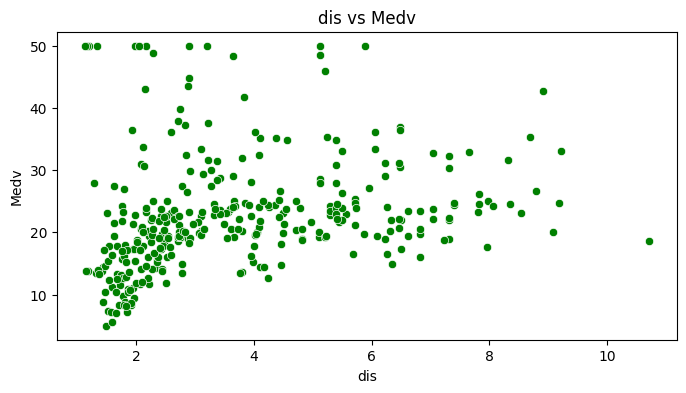

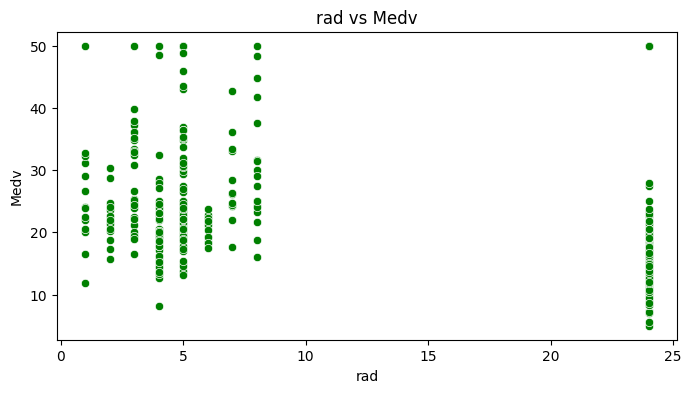

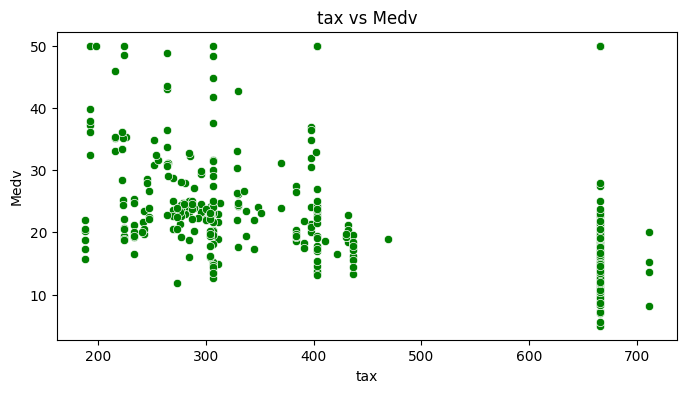

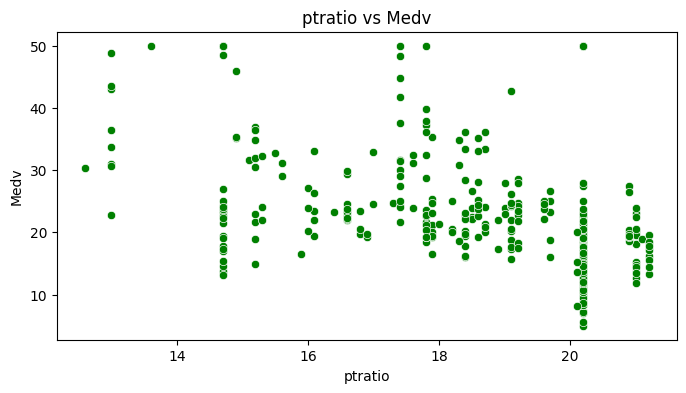

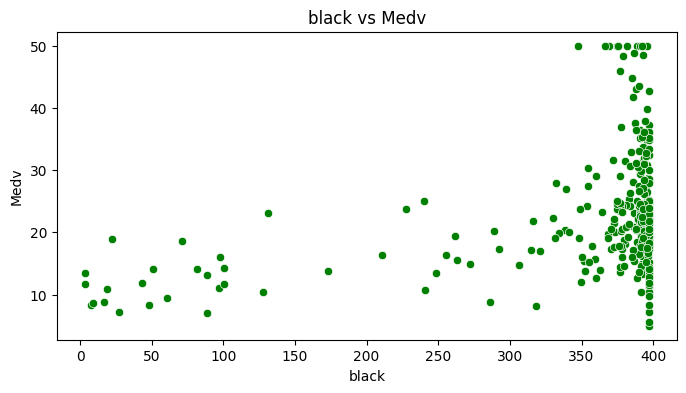

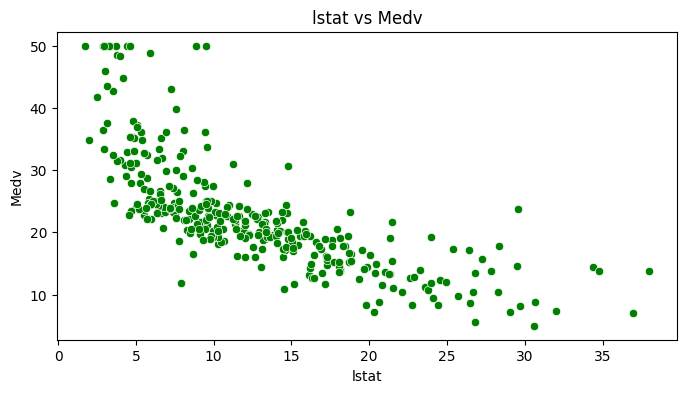

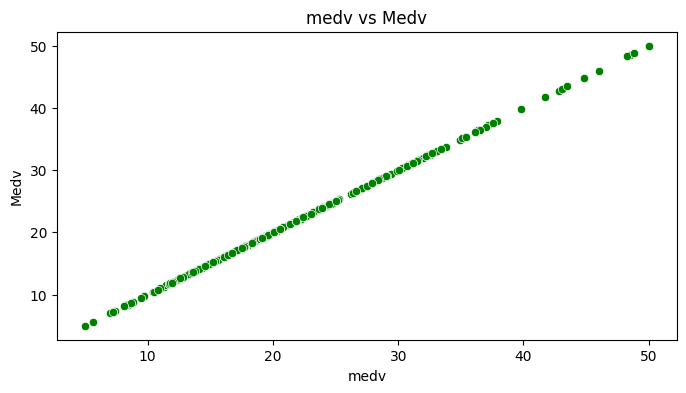

In [158]:
for col in df:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df['medv'], color='green')
    plt.title(f'{col} vs Medv')
    plt.xlabel(col)
    plt.ylabel('Medv')
    plt.show()

##### Correlation Heatmap
Correlation heatmap to identify relationships between numerical features and the target variable.

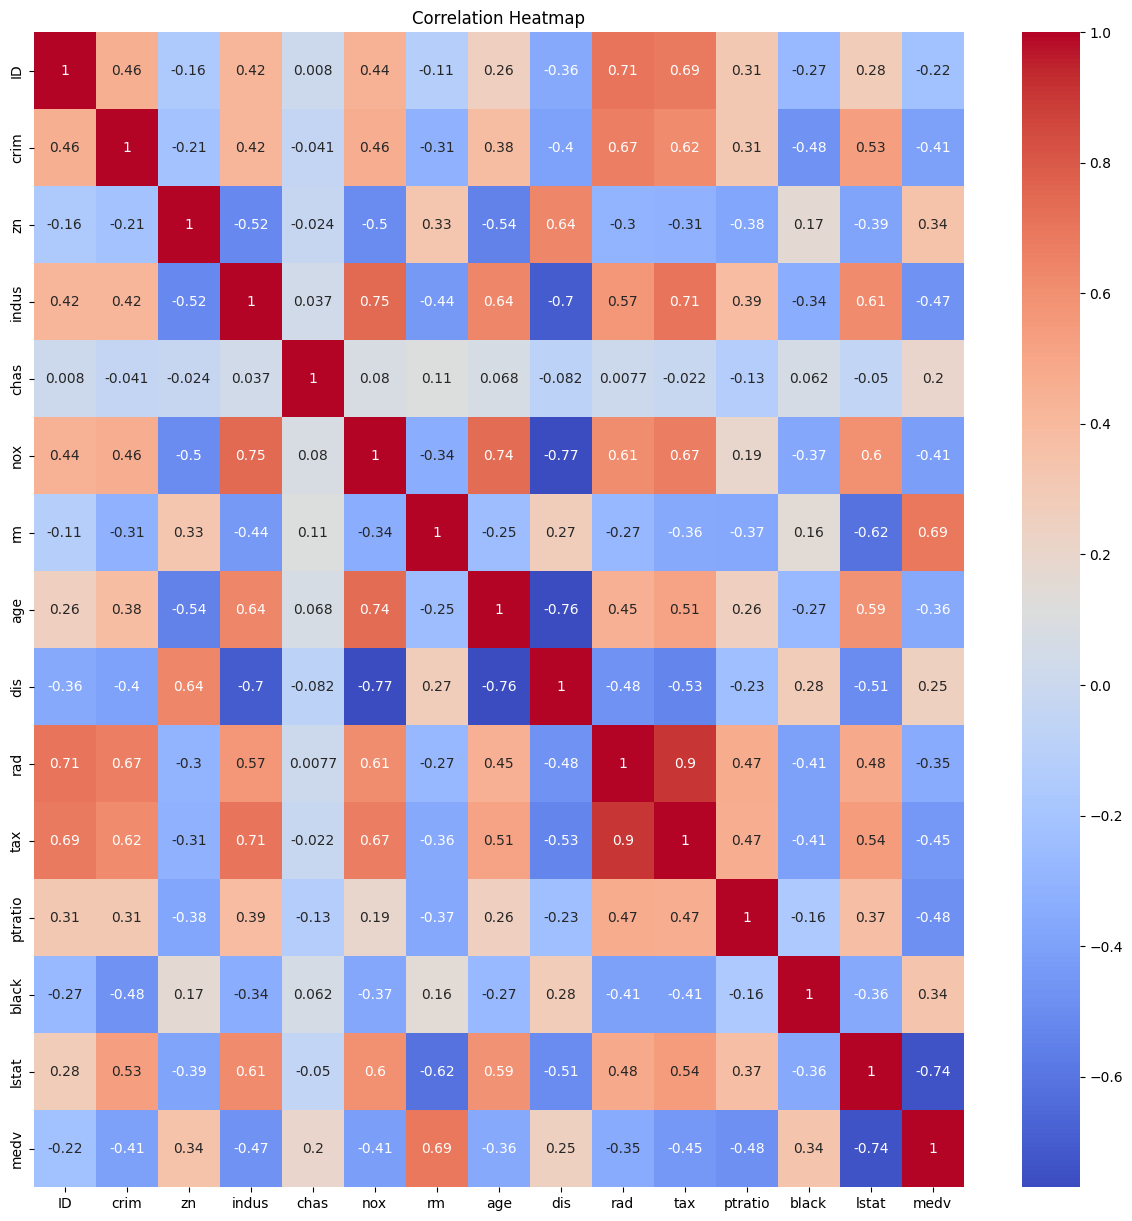

In [159]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Looks like top features are:
- rm
- zn
- dis
- black

##### Pair Plots
Pair plots to visualize pairwise relationships between numerical features and the target variable.

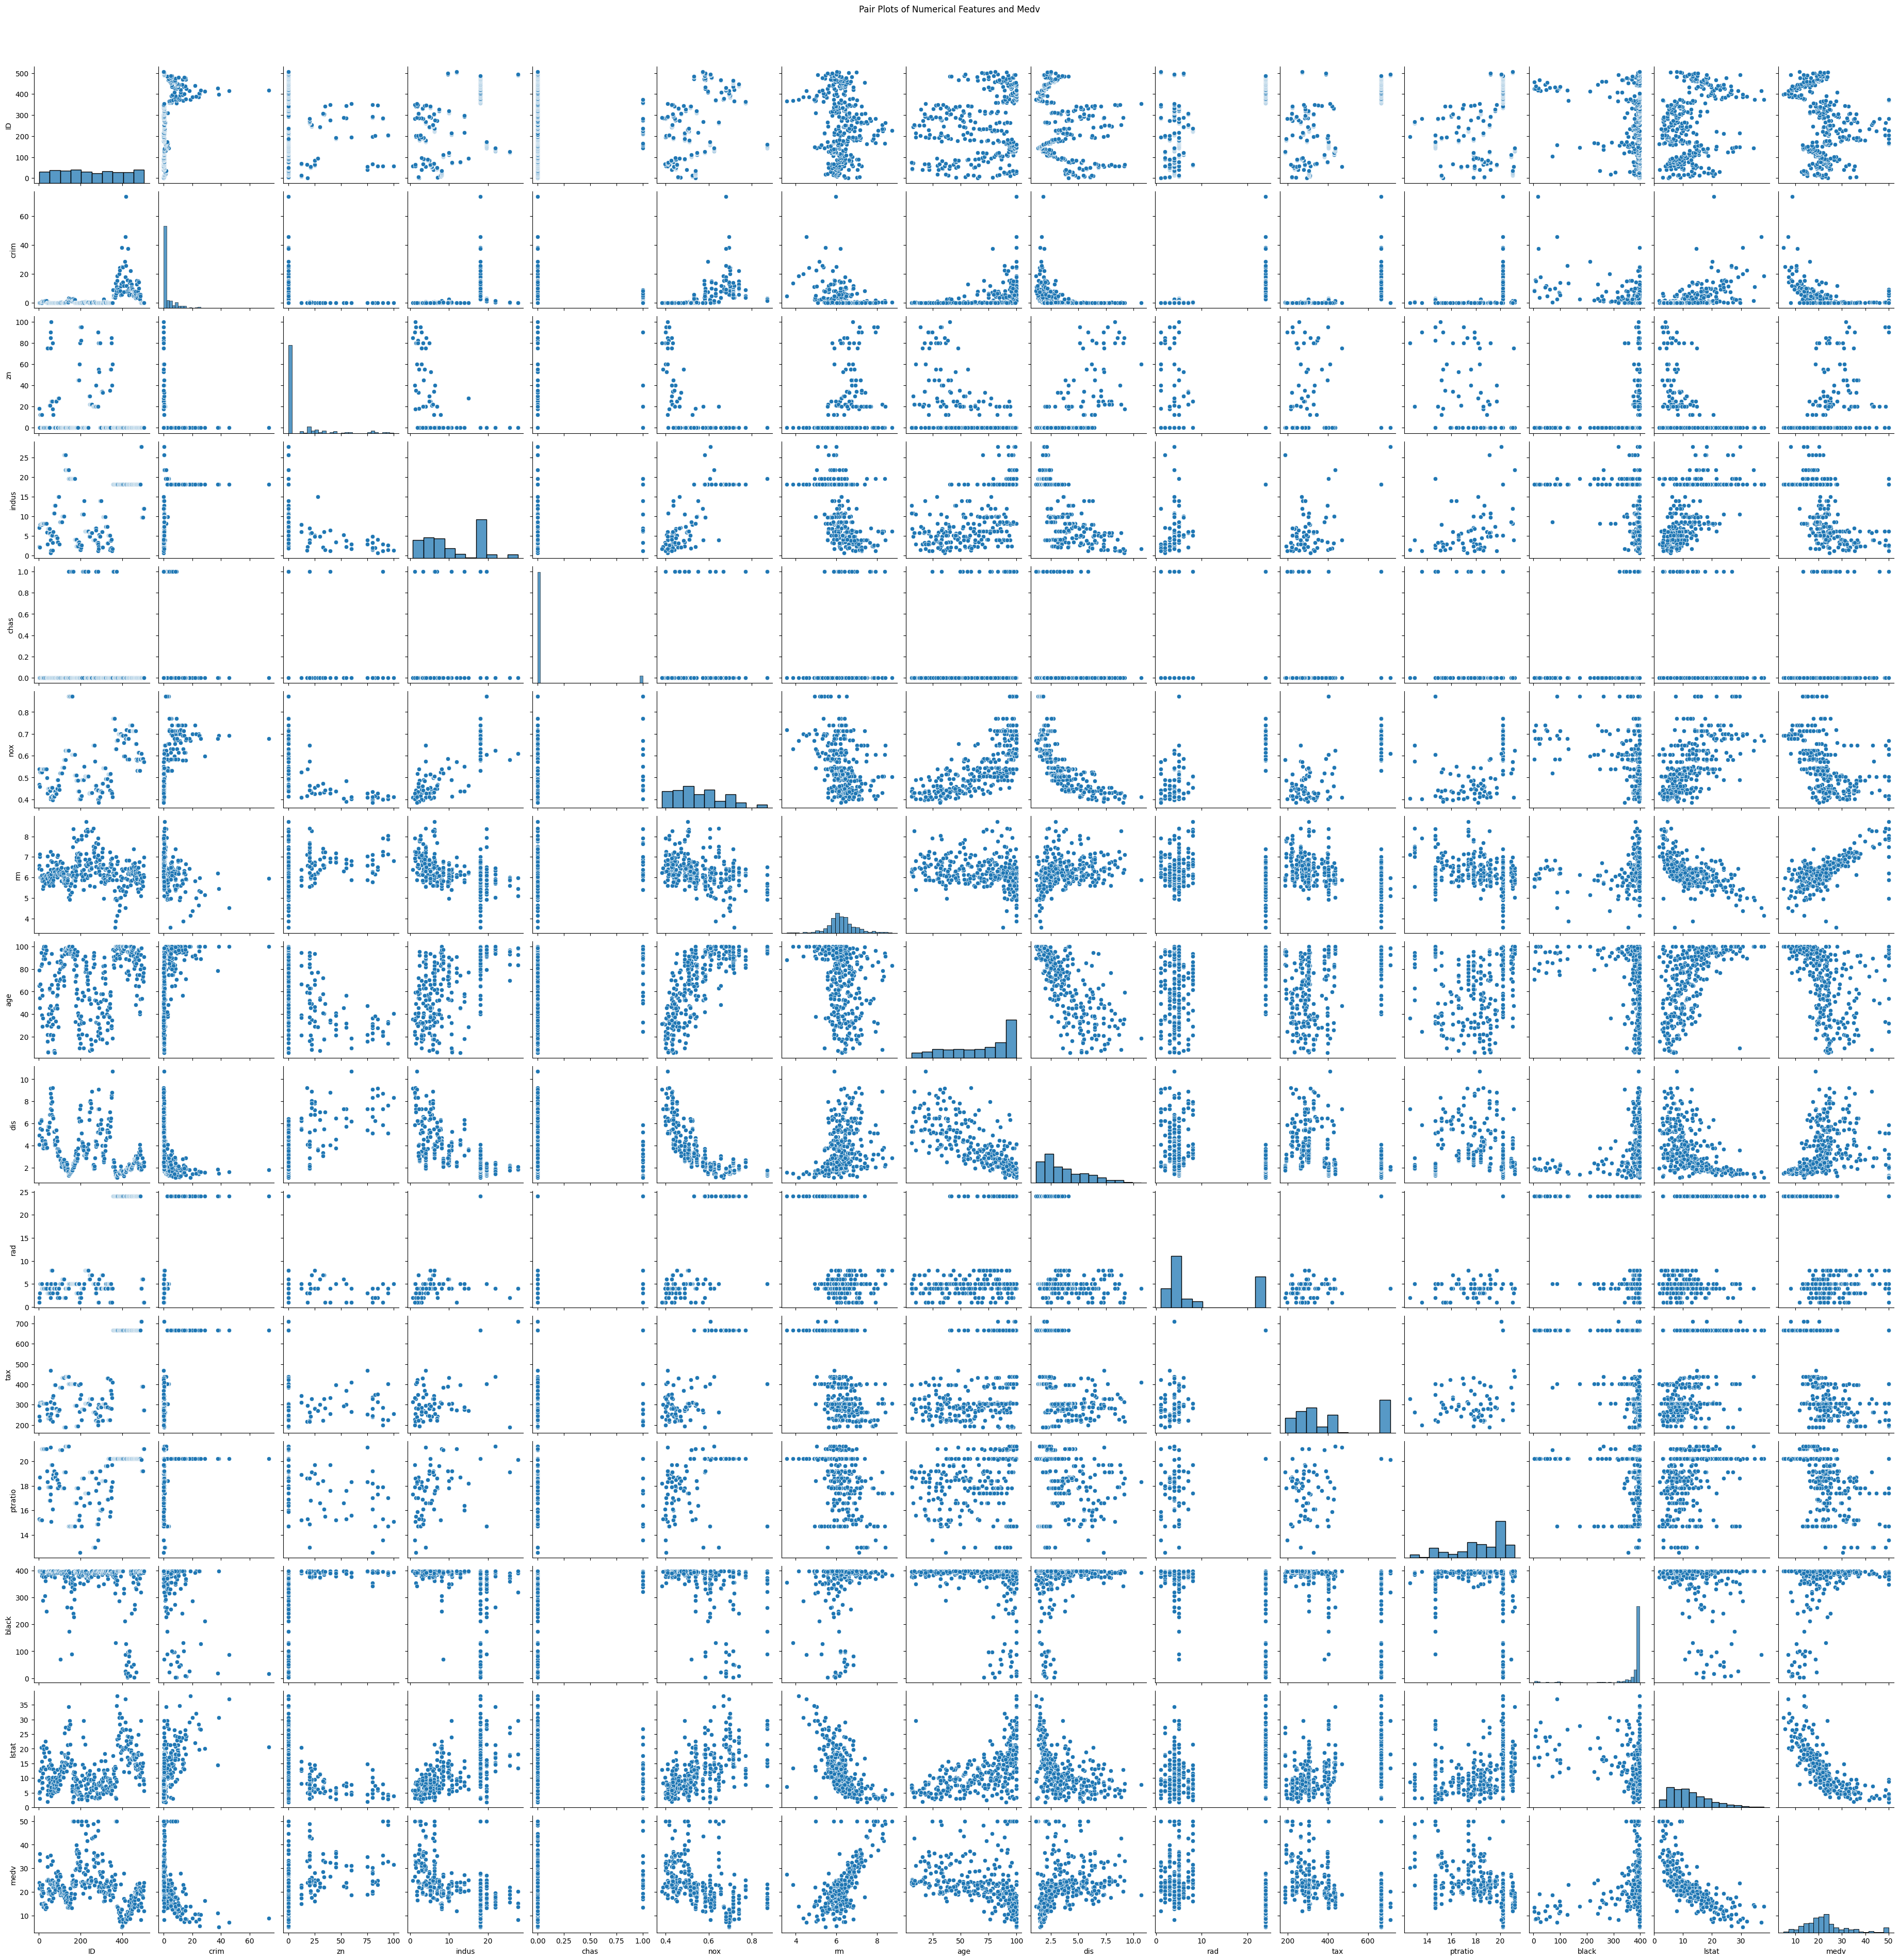

In [160]:
sns.pairplot(df)
plt.suptitle('Pair Plots of Numerical Features and Medv', y=1.02)
plt.show()

##### Outlier Detection
Using box plots to identify outliers in numerical features.


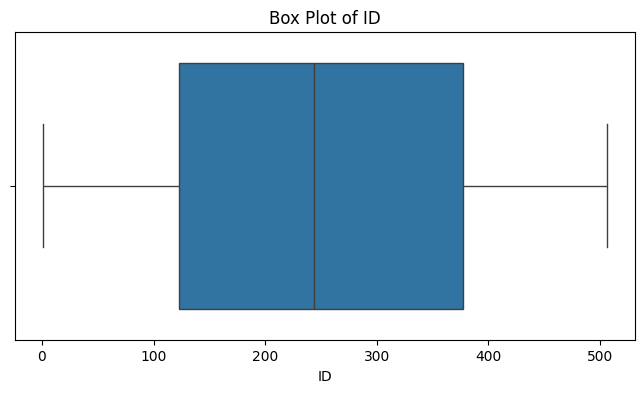

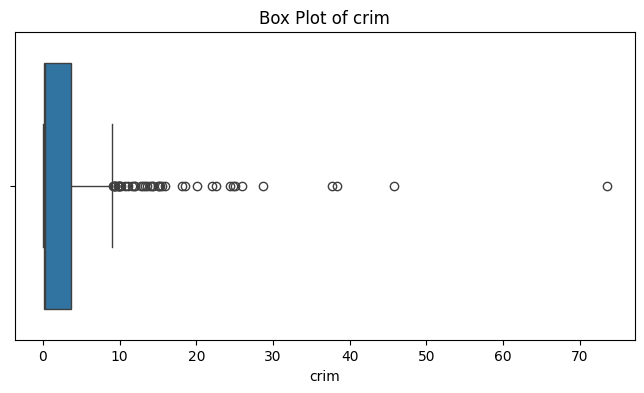

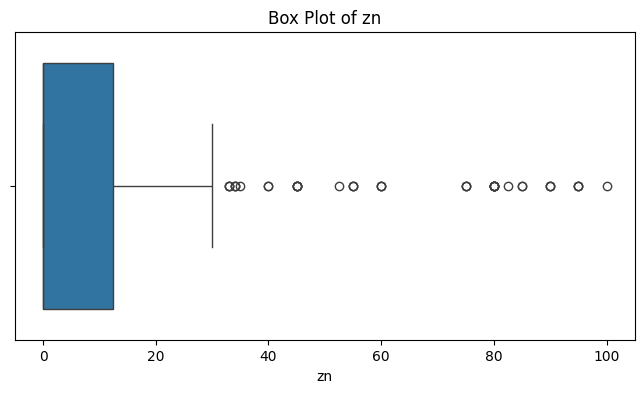

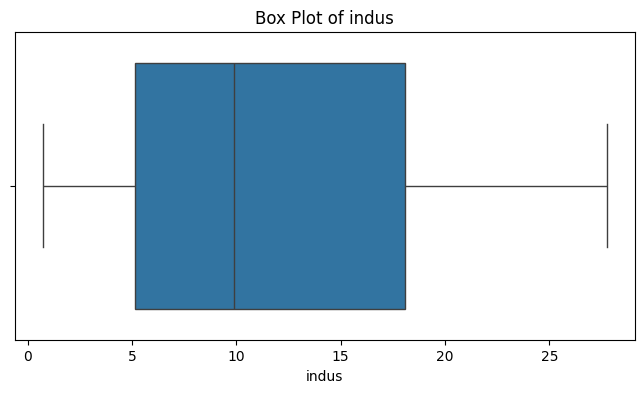

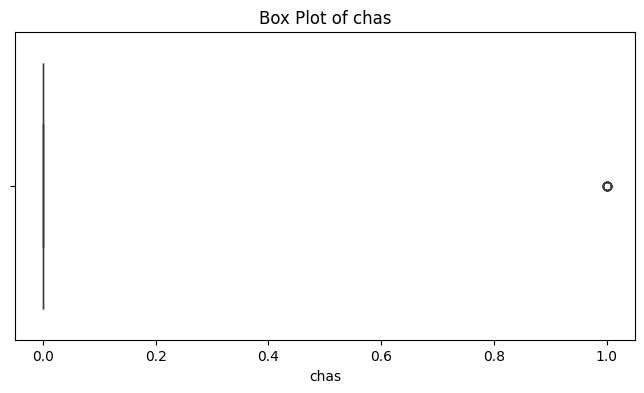

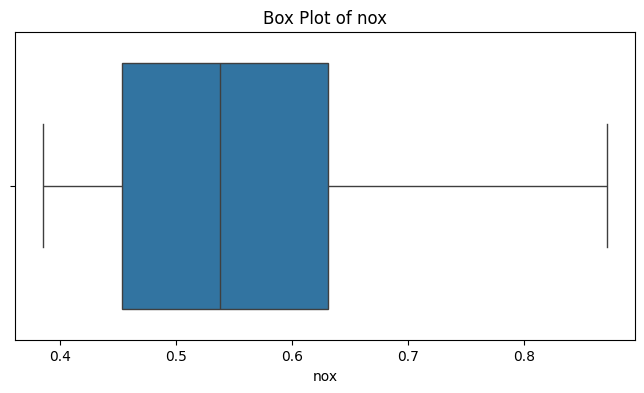

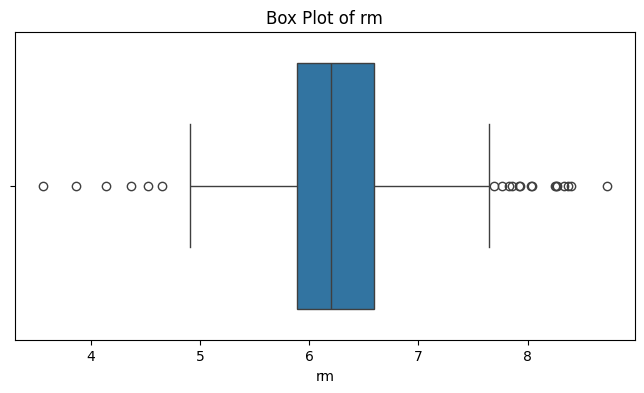

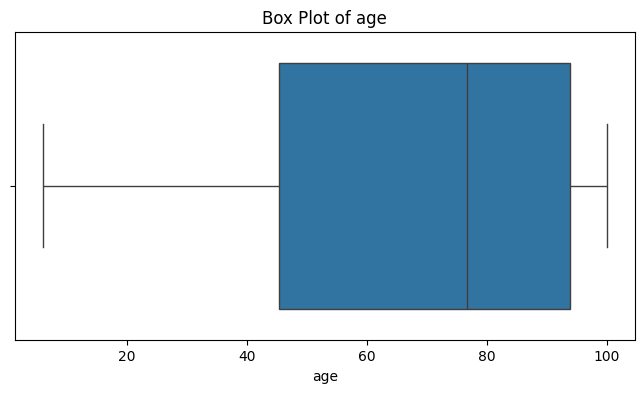

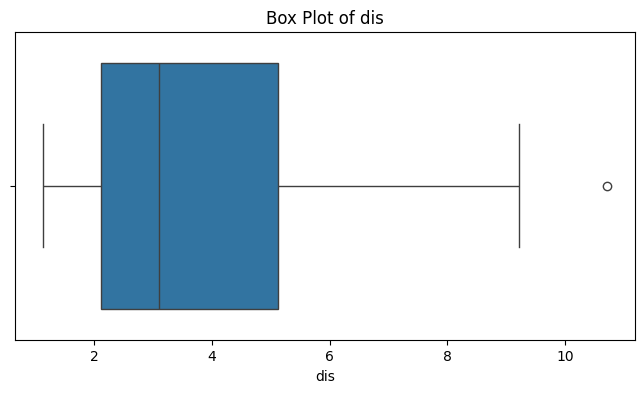

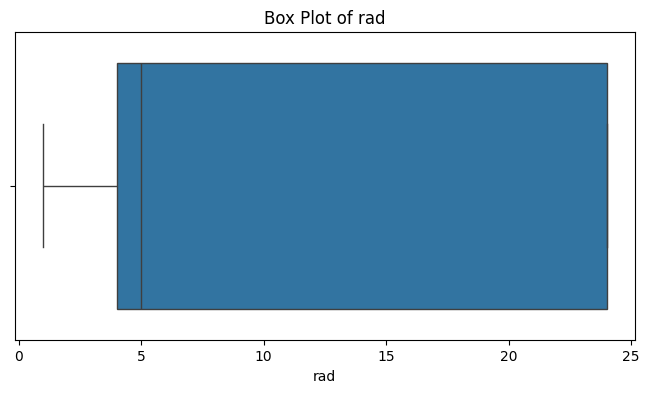

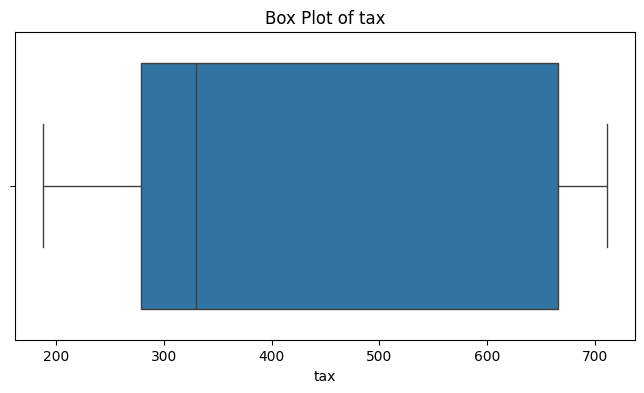

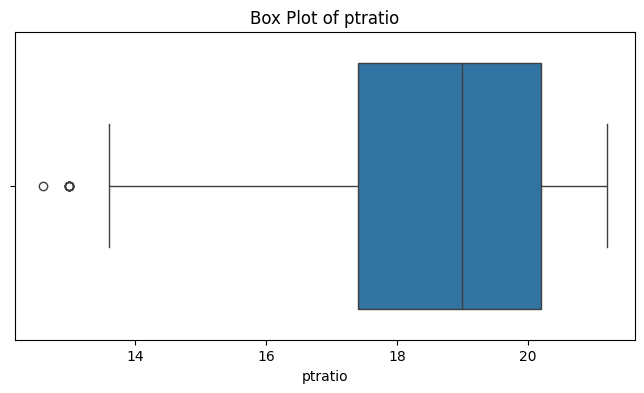

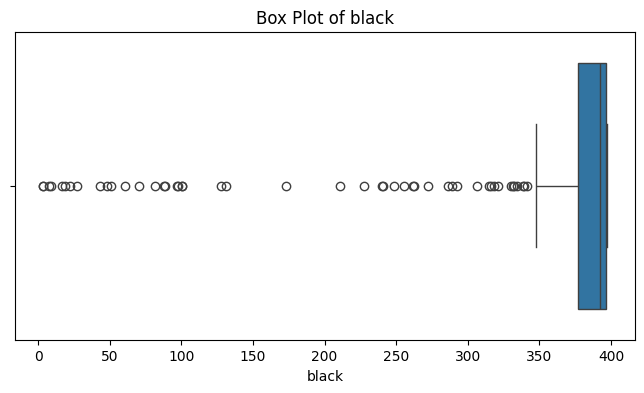

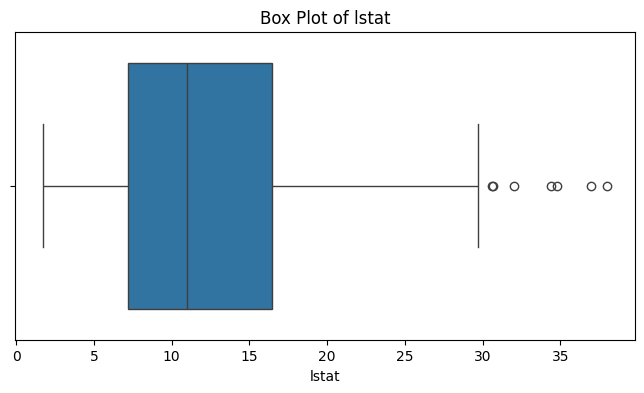

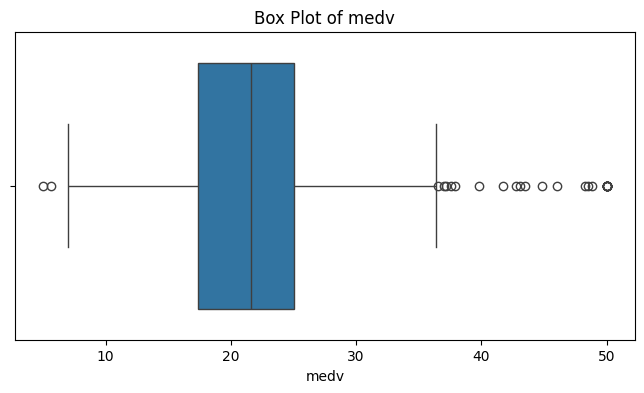

In [161]:
for col in df:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

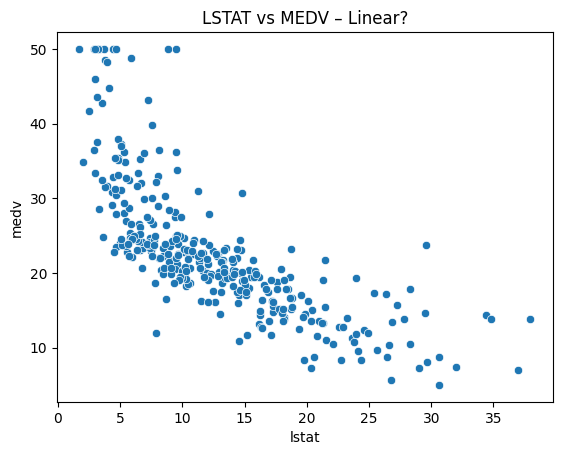

In [162]:
sns.scatterplot(x=df['lstat'], y=df['medv'])
plt.title("LSTAT vs MEDV – Linear?")
plt.show()

In [163]:
df['lstat2'] = df['lstat'] ** 2


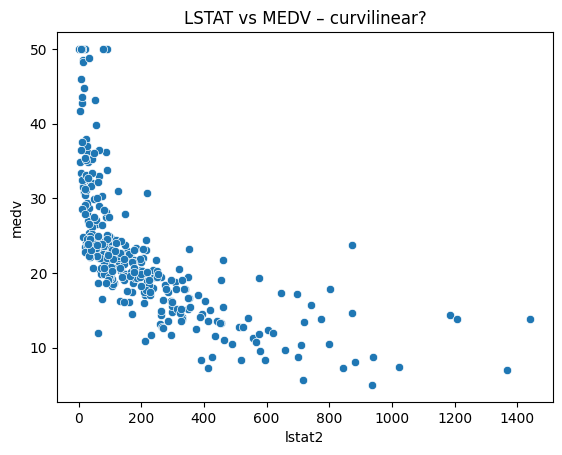

In [164]:
sns.scatterplot(x=df['lstat2'], y=df['medv'])
plt.title("LSTAT vs MEDV – curvilinear?")
plt.show()

### Conclusions from EDA

#### Feature Impact Summary

Positively Correlated Features
|Column	|Meaning	|Effect
|---|---|---|
AGE	|Proportion of old houses	|Moderate positive
RM	|Avg. number of rooms	|Strong positive
ZN	|Residential land proportion	|Moderate positive
BLACK	|Demographic proportion	|Moderate positive

Negatively Correlated Features

Most likely:

|Column	|Meaning	|Effect
|---|---|---|
LSTAT	|Lower status population %	|Strong negative
PTRATIO	|Student-teacher ratio	|Moderate negative
CRIM	|Crime rate	|Moderate negative
DIS	|Distance to employment centers	|Often negative

## Data Preprocessing
We will handle missing values, encode categorical variables, and scale numerical features as needed.

### Scaling and Encoding
We will use StandardScaler for numerical features and OneHotEncoder for categorical features.



In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.tolist())
    ],
    remainder='drop'
)



### Testing and Training Split
Splitting the dataset into training and testing sets to evaluate model performance.

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Applying Preprocessing
Applying the preprocessing steps to the training and testing data.

In [167]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Model Training and Evaluation
Training a multiple linear regression model using the preprocessed training data.

### Linear Regression Model with all Features
Training a linear regression model using all features and evaluating its performance on the test set.

In [168]:
from sklearn.linear_model import LinearRegression
model_all = LinearRegression()
model_all.fit(X_train_processed, y_train)
y_pred_all = model_all.predict(X_test_processed)

In [181]:
from sklearn.metrics import mean_squared_error, r2_score
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print(f"Root Mean Squared Error (All Features): {(mse_all ** 0.5):.2f}")
print(f"R^2 Score (All Features): {r2_all:.2f}")

Root Mean Squared Error (All Features): 4.84
R^2 Score (All Features): 0.74


Let us visualise the predictions vs actual charges.

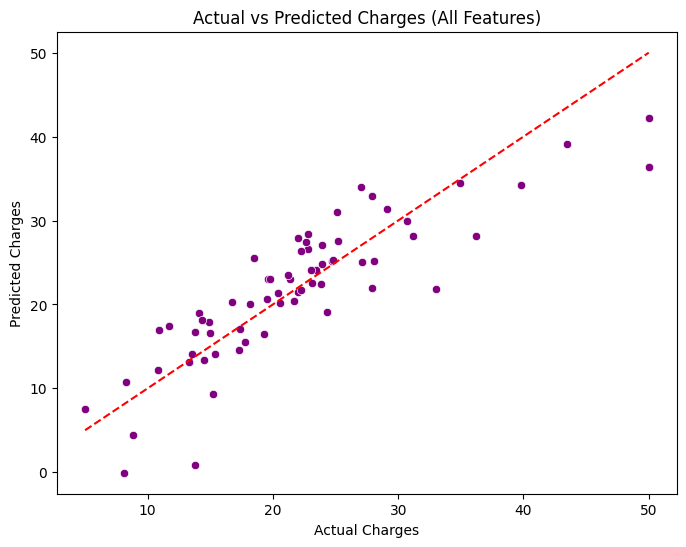

In [170]:
# visualize predictions vs actual charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_all, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (All Features)')
plt.show()

Generate output file

In [171]:
# Generate output file
output_predictions = model_all.predict(preprocessor.transform(df_predict))
output_df = pd.DataFrame({
    'ID': df_predict['ID'],
    'medv': output_predictions
})
output_df.to_csv('data/boston-housing/submission_all_feature.csv', index=False)

### Linear Regression Model with combined feature
Training a linear regression model using the combined feature (lstat2) along with other impactful

In [180]:
X = df.drop("medv", axis=1)
y = df["medv"]

from sklearn.model_selection import train_test_split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor_combined = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.tolist())
    ],
    remainder='drop'
)

X_train_combined_processed = preprocessor_combined.fit_transform(X_train_combined)
X_test_combined_processed = preprocessor_combined.transform(X_test_combined)

model_combined = LinearRegression()
model_combined.fit(X_train_combined_processed, y_train_combined)
y_pred_combined = model_combined.predict(X_test_combined_processed)
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)
r2_combined = r2_score(y_test_combined, y_pred_combined)
print(f"Root Mean Squared Error (Combined Feature): {(mse_combined ** 0.5):.2f}")
print(f"R^2 Score (Combined Feature): {r2_combined:.2f}")

Root Mean Squared Error (Combined Feature): 3.86
R^2 Score (Combined Feature): 0.83


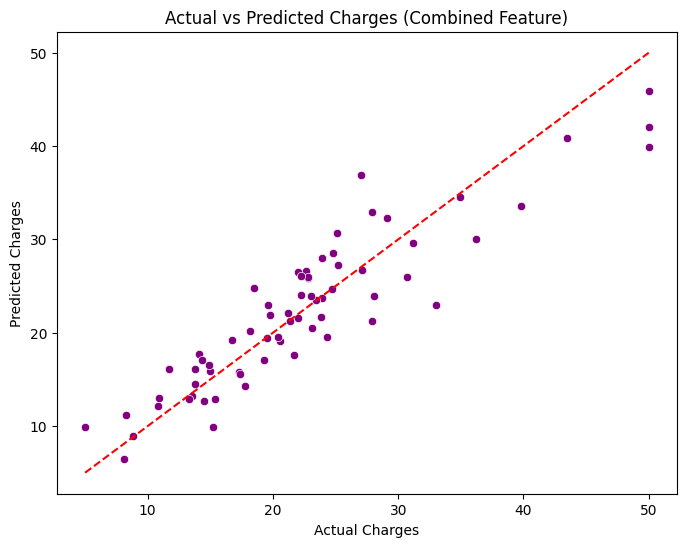

In [173]:
# visualize predictions vs actual charges for combined feature model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_combined, y=y_pred_combined, color='purple')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Combined Feature)')
plt.show()

This fits much better than previous models.

Generate output file

In [174]:
df_predict['lstat2'] = df_predict['lstat'] ** 2

In [175]:
# Generate output file
output_predictions = model_combined.predict(preprocessor_combined.transform(df_predict))
output_df = pd.DataFrame({
    'ID': df_predict['ID'],
    'medv': output_predictions
})
output_df.to_csv('data/boston-housing/submission_combined_feature.csv', index=False)

### Applying Ridge Regression
Training a Ridge regression model to see if it improves performance over linear regression with combined feature.

In [176]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_combined_processed, y_train_combined)
y_pred_ridge = ridge_model.predict(X_test_combined_processed)
mse_ridge = mean_squared_error(y_test_combined, y_pred_ridge)
r2_ridge = r2_score(y_test_combined, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.2f}")
print(f"R^2 Score (Ridge Regression): {r2_ridge:.2f}")  

Mean Squared Error (Ridge Regression): 15.22
R^2 Score (Ridge Regression): 0.83


No improvement with Ridge Regression in this case.pact observed with standard linear regression.

#### Applying Lasso Regression
Training a Lasso regression model to see if it improves performance over standard linear regression.

In [177]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_combined_processed, y_train_combined)
y_pred_lasso = lasso_model.predict(X_test_combined_processed)
mse_lasso = mean_squared_error(y_test_combined, y_pred_lasso)
r2_lasso = r2_score(y_test_combined, y_pred_lasso)
print(f"Mean Squared Error (Lasso Regression): {mse_lasso:.2f}")
print(f"R^2 Score (Lasso Regression): {r2_lasso:.2f}")

Mean Squared Error (Lasso Regression): 15.85
R^2 Score (Lasso Regression): 0.82


## Conclusions
- The combined feature (lstat2) significantly improved model performance.
- Ridge and Lasso regression did not provide significant improvement over standard linear regression in this case.